In [56]:
import pandas as pd
import re
import os
import glob
import snapatac2 as snap

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils

In [58]:
method = 'wilcoxon'

In [59]:
def merge_region(region='PFC',condition="MC",folder='/data2st1/junyi/output/atac0416/dar/region_nt/',method='wilcoxon',blacklist=['Doublet','NN']):
    df_result = pd.DataFrame()
    files = glob.glob(f'{folder}/{region}*{condition}_{method}.csv')
    for file in files:
        if any([file.find(black) > -1 for black in blacklist]):
            continue
        df_dar = pd.read_csv(file,index_col=0)

        ctname = file.split('/')[-1].replace('.csv', '')
        ctname = "_".join(ctname.split('_')[1:-2])
        if len(df_dar) == 0:
            continue
        df_dar['ctname'] = ctname
        df_result = pd.concat([df_result, df_dar], axis=0, ignore_index=True)
    df_result['region'] = region
    df_result['condition'] = condition
    return df_result


In [60]:
df_PFC_MC = merge_region(region='PFC',condition="MC",method=method)
df_PFC_MW = merge_region(region='PFC',condition="MW", method=method)
df_HIP_MC = merge_region(region='HIP',condition="MC",method=method)
df_HIP_MW = merge_region(region='HIP',condition="MW", method=method)
df_AMY_MC = merge_region(region='AMY',condition="MC",method=method)
df_AMY_MW = merge_region(region='AMY',condition="MW", method=method)
df_DAR_ALL = pd.concat([df_PFC_MC, df_PFC_MW, df_HIP_MC, df_HIP_MW, df_AMY_MC, df_AMY_MW], axis=0, ignore_index=True)

In [80]:
df_DAR_ALL

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,ctname,region,condition
0,chr2:98666917-98667418,23.533844,0.900414,1.837545e-122,2.519275e-116,0.957454,0.882398,PFC_GABA,PFC,MC
1,chr2:98662045-98662546,19.915870,0.912399,2.964556e-88,2.032203e-82,0.796225,0.644653,PFC_GABA,PFC,MC
2,chr2:98666414-98666915,18.153790,0.749082,1.198400e-73,5.476689e-68,0.869162,0.760224,PFC_GABA,PFC,MC
3,chr9:35305176-35305677,13.207377,0.778344,7.954764e-40,2.726495e-34,0.575816,0.446279,PFC_GABA,PFC,MC
4,chr2:98662628-98663129,11.916548,0.757572,9.704762e-33,2.661046e-27,0.520154,0.391669,PFC_GABA,PFC,MC
...,...,...,...,...,...,...,...,...,...,...
79593,chr2:149768495-149768996,4.400878,0.268622,1.078134e-05,4.284411e-02,0.214733,0.183768,AMY_Glut,AMY,MW
79594,chr12:41674762-41675263,4.381599,0.627041,1.178112e-05,4.628056e-02,0.095661,0.062748,AMY_Glut,AMY,MW
79595,chr2:28068461-28068962,4.379142,0.145017,1.191474e-05,4.651369e-02,0.310898,0.278071,AMY_Glut,AMY,MW
79596,chr5:71011211-71011712,4.378640,0.485994,1.194225e-05,4.651369e-02,0.121998,0.089826,AMY_Glut,AMY,MW


In [74]:
df_DAR_mememto = pd.concat([
    merge_region(region='PFC',condition="MC",method='mementob'),
    merge_region(region='PFC',condition="MW", method='mementob'),
    merge_region(region='HIP',condition="MC",method='mementob'),
    merge_region(region='HIP',condition="MW", method='mementob'),
    merge_region(region='AMY',condition="MC",method='mementob'),
    merge_region(region='AMY',condition="MW", method='mementob'),
], axis=0, ignore_index=True)


In [82]:
df_DAR_mememto

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,condition
0,chr15:75086569-75087070,stim,0.432872,0.021699,1.011588e-88,-0.299096,0.125762,1.999109e-02,PFC_Glut,PFC,MC
1,chr12:120028551-120029052,stim,0.480524,0.024779,5.125947e-84,0.225606,0.120315,5.658753e-02,PFC_Glut,PFC,MC
2,chrX:143482812-143483313,stim,0.676692,0.040407,3.030414e-63,-0.410343,0.157938,1.027334e-02,PFC_Glut,PFC,MC
3,chr2:98662045-98662546,stim,0.504651,0.031239,5.452844e-59,-1.212180,0.093709,5.131220e-38,PFC_Glut,PFC,MC
4,chr2:98662628-98663129,stim,0.525859,0.037705,1.715753e-44,-0.758739,0.097764,1.811849e-14,PFC_Glut,PFC,MC
...,...,...,...,...,...,...,...,...,...,...,...
92126,chr8:110465569-110466070,stim,-0.112227,0.058291,4.932913e-02,0.220969,0.189618,2.729488e-01,AMY_GABA,AMY,MW
92127,chr2:29669624-29670125,stim,-0.142648,0.073045,4.936132e-02,0.079156,0.198688,6.719162e-01,AMY_GABA,AMY,MW
92128,chr16:94919198-94919699,stim,-0.121242,0.062304,4.937179e-02,0.194725,0.213193,3.660465e-01,AMY_GABA,AMY,MW
92129,chr8:105304519-105305020,stim,-0.134731,0.067952,4.939417e-02,0.467569,0.196791,1.478859e-02,AMY_GABA,AMY,MW


In [83]:
df_DAR_mememto.rename(columns={'gene': 'names'}, inplace=True)

In [86]:
df_inner=df_DAR_ALL.merge(
    df_DAR_mememto[['names', 'ctname', 'region', 'condition']],
    how='inner',
    left_on=['names', 'ctname', 'region', 'condition'],
    right_on=['names', 'ctname', 'region', 'condition'],
)

In [90]:
df_DAR_ALL.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,442
1,AMY_GABA,MW,AMY,13
2,AMY_Glut,MC,AMY,278
3,AMY_Glut,MW,AMY,77
4,HIP_GABA,MC,HIP,3
5,HIP_Glut,MC,HIP,9881
6,HIP_Glut,MW,HIP,25
7,PFC_GABA,MC,PFC,12
8,PFC_GABA,MW,PFC,1473
9,PFC_Glut,MC,PFC,111


In [89]:
df_DAR_mememto.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,6850
1,AMY_GABA,MW,AMY,709
2,AMY_Glut,MC,AMY,5354
3,AMY_Glut,MW,AMY,9056
4,HIP_GABA,MC,HIP,4682
5,HIP_GABA,MW,HIP,160
6,HIP_Glut,MC,HIP,16677
7,HIP_Glut,MW,HIP,2519
8,PFC_GABA,MC,PFC,313
9,PFC_GABA,MW,PFC,9884


In [91]:
df_inner.groupby(['ctname','condition','region']).size().reset_index(name='counts')

,ctname,condition,region,counts
0,AMY_GABA,MC,AMY,441
1,AMY_GABA,MW,AMY,13
2,AMY_Glut,MC,AMY,276
3,AMY_Glut,MW,AMY,66
4,HIP_GABA,MC,HIP,3
5,HIP_Glut,MC,HIP,9583
6,HIP_Glut,MW,HIP,25
7,PFC_GABA,MC,PFC,12
8,PFC_GABA,MW,PFC,1472
9,PFC_Glut,MC,PFC,49


In [107]:
df_annotattion = utils.annotate_region(df_DAR_ALL,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [108]:
df_annotattion

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,ctname,region,condition,gene_name,gene_id,gstart,gend,strand,distance
0,chr2:98666917-98667418,23.533844,0.900414,1.837545e-122,2.519275e-116,0.957454,0.882398,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,0
1,chr2:98662045-98662546,19.915870,0.912399,2.964556e-88,2.032203e-82,0.796225,0.644653,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,0
2,chr2:98666414-98666915,18.153790,0.749082,1.198400e-73,5.476689e-68,0.869162,0.760224,PFC_GABA,PFC,MC,Gm10800,ENSMUSG00000075014.1,98666546,98667301,-,0
3,chr9:35305176-35305677,13.207377,0.778344,7.954764e-40,2.726495e-34,0.575816,0.446279,PFC_GABA,PFC,MC,Gm33838,ENSMUSG00000111059.1,35301721,35307599,-,0
4,chr2:98662628-98663129,11.916548,0.757572,9.704762e-33,2.661046e-27,0.520154,0.391669,PFC_GABA,PFC,MC,Gm10801,ENSMUSG00000075015.3,98662236,98664083,+,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79593,chr2:149768495-149768996,4.400878,0.268622,1.078134e-05,4.284411e-02,0.214733,0.183768,AMY_Glut,AMY,MW,Gm14133,ENSMUSG00000087029.1,149743926,149798743,-,0
79594,chr12:41674762-41675263,4.381599,0.627041,1.178112e-05,4.628056e-02,0.095661,0.062748,AMY_Glut,AMY,MW,Immp2l,ENSMUSG00000056899.10,41024089,41955588,+,0
79595,chr2:28068461-28068962,4.379142,0.145017,1.191474e-05,4.651369e-02,0.310898,0.278071,AMY_Glut,AMY,MW,Fcnb,ENSMUSG00000026835.15,28076377,28084885,-,7416
79596,chr5:71011211-71011712,4.378640,0.485994,1.194225e-05,4.651369e-02,0.121998,0.089826,AMY_Glut,AMY,MW,Gabra2,ENSMUSG00000000560.9,70957596,71095849,-,0


In [109]:
df_annotattion.to_csv(f'/data2st1/junyi/output/atac0416/dar/region_nt/df_annotattion_{method}.csv',index=False)

In [100]:
df_counts = df_DAR_ALL.groupby(['ctname','condition','region']).size().reset_index(name='counts')

In [101]:
df_counts.sort_values(by=['region','condition','counts'])

,ctname,condition,region,counts
2,AMY_Glut,MC,AMY,278
0,AMY_GABA,MC,AMY,442
1,AMY_GABA,MW,AMY,13
3,AMY_Glut,MW,AMY,77
4,HIP_GABA,MC,HIP,3
5,HIP_Glut,MC,HIP,9881
6,HIP_Glut,MW,HIP,25
7,PFC_GABA,MC,PFC,12
9,PFC_Glut,MC,PFC,111
8,PFC_GABA,MW,PFC,1473


/tmp/ipykernel_1721522/2827453906.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_counts, y='ctname', x='counts', hue='condition', palette=['#FF7F0E','#1F77B4'], dodge=True,ci=None)


(0.0, 5000.0)

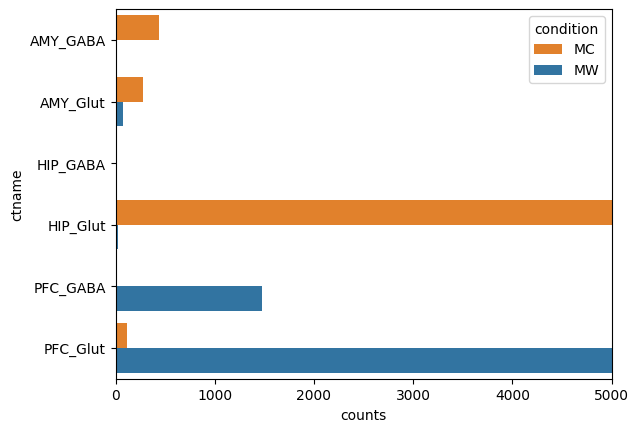

In [105]:
sns.barplot(data=df_counts, y='ctname', x='counts', hue='condition', palette=['#FF7F0E','#1F77B4'], dodge=True,ci=None)
plt.xlim(0, 5000)

/tmp/ipykernel_1721522/3047026108.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="condition",y='counts', hue="condition",estimator='sum',ci=None, col="region",order=['MW','MC'],hue_order=['MC','MW'], data=df_counts, kind="bar", height=4, aspect=1.5,sharey=False)


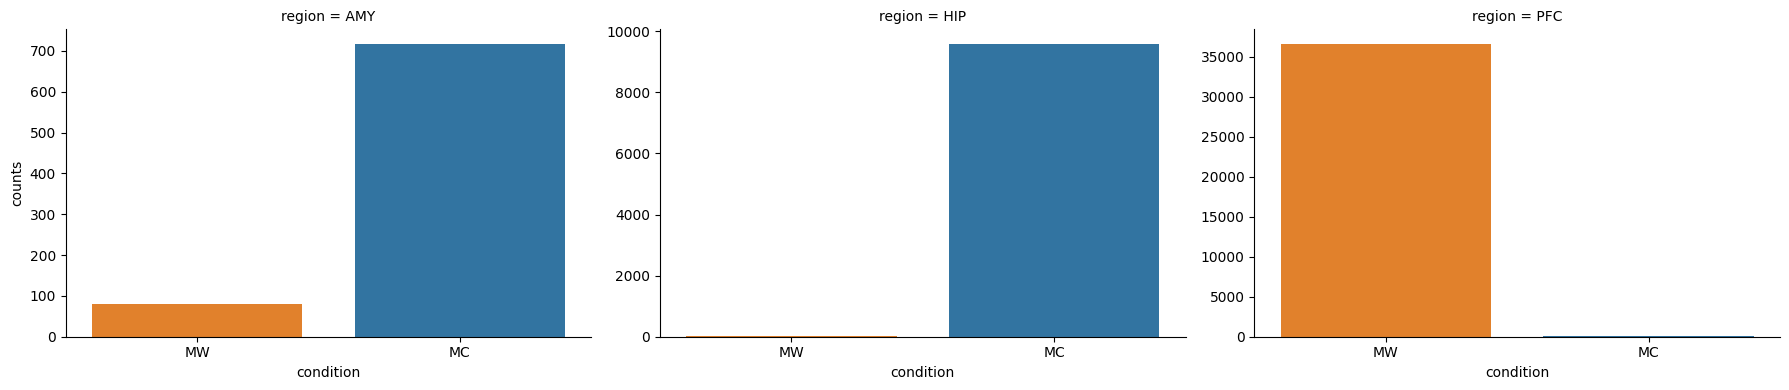

In [98]:
sns.catplot(x="condition",y='counts', hue="condition",estimator='sum',ci=None, col="region",order=['MW','MC'],hue_order=['MC','MW'], data=df_counts, kind="bar", height=4, aspect=1.5,sharey=False)

In [125]:
df_sub["names"].str.split(r'[:-]', expand=True)

,0,1,2
46974,chr17,39843930,39844431
46975,chr17,39845182,39845683
46976,chr17,39845723,39846224
46977,chr17,39844552,39845053
46978,chr17,39843117,39843618
46979,chr17,39848454,39848955
46980,chr17,36231234,36231735
46981,chr11,109011570,109012071
46982,chr17,39846366,39846867
46983,chr5,146260847,146261348


In [126]:
out_dir ='/data2st1/junyi/output/atac0416/dar/motif/region_nt'
for ct in df_inner['ctname'].unique():
    for condition in df_inner['condition'].unique():
        df_sub = df_inner[(df_inner['ctname'] == ct) & (df_inner['condition'] == condition)]
        if len(df_sub) == 0:
            continue
        df_sub["names"].str.split(r'[:-]', expand=True).to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)


In [128]:
files = glob.glob('/data2st1/junyi/output/atac0416/dar/motif/region_nt/*_inner.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/atac0416/dar/motif/region_nt/','--write_html']
    print(command_str)
    subprocess.run(command_str)

['pycistarget', 'cistarget', '--cistarget_db_fname', '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather', '--bed_fname', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/HIP_Glut_MC_inner.bed', '--species', 'mus_musculus', '--auc_threshold', '0.005', '--nes_threshold', '3.0', '--rank_threshold', '0.05', '--path_to_motif_annotations', '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl', '--output_folder', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/', '--write_html']
2025-05-06 17:07:21,197 cisTarget    INFO     Reading cisTarget database
2025-05-06 17:09:05,739 cisTarget    INFO     Running cisTarget for HIP_Glut_MC_inner which has 10566 regions
2025-05-06 17:09:23,799 cisTarget    INFO     Annotating motifs for HIP_Glut_MC_inner
2025-05-06 17:09:28,808 cisTarget    INFO     Getting cistromes for HIP_Glut_MC_inner
['pycistarget', 'cistarget', '--cistarget_db_fname', '/data2st1/junyi/scenic/mouse/motif/mm1

Traceback (most recent call last):
  File "/home/junyichen/anaconda3/envs/snapatac2/bin/pycistarget", line 8, in <module>
    sys.exit(main())
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/pycistarget.py", line 586, in main
    args.func(args)
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/pycistarget.py", line 69, in cistarget
    run_cistarget_command(
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/commands.py", line 93, in run_cistarget_command
    ctx_db = cisTargetDatabase(
  File "/home/junyichen/code/pycistarget/src/pycistarget/motif_enrichment_cistarget.py", line 55, in __init__
    self.regions_to_db, self.db_rankings, self.total_regions = self.load_db(fname,
  File "/home/junyichen/code/pycistarget/src/pycistarget/motif_enrichment_cistarget.py", line 111, in load_db
    target_to_db = target_to_query(region_sets, list(db_regions), fraction_overlap = fraction_overlap)
  File "/home/junyichen/code/pycistarget/src/pycistarget/utils.py",

['pycistarget', 'cistarget', '--cistarget_db_fname', '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather', '--bed_fname', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/AMY_GABA_MW_inner.bed', '--species', 'mus_musculus', '--auc_threshold', '0.005', '--nes_threshold', '3.0', '--rank_threshold', '0.05', '--path_to_motif_annotations', '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl', '--output_folder', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/', '--write_html']
2025-05-06 17:14:27,581 cisTarget    INFO     Reading cisTarget database
2025-05-06 17:14:41,009 cisTarget    INFO     Running cisTarget for AMY_GABA_MW_inner which has 1 regions
2025-05-06 17:14:53,091 cisTarget    INFO     Annotating motifs for AMY_GABA_MW_inner
2025-05-06 17:14:55,336 cisTarget    INFO     Getting cistromes for AMY_GABA_MW_inner
['pycistarget', 'cistarget', '--cistarget_db_fname', '/data2st1/junyi/scenic/mouse/motif/mm10_sc

Traceback (most recent call last):
  File "/home/junyichen/anaconda3/envs/snapatac2/bin/pycistarget", line 8, in <module>
    sys.exit(main())
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/pycistarget.py", line 586, in main
    args.func(args)
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/pycistarget.py", line 69, in cistarget
    run_cistarget_command(
  File "/home/junyichen/code/pycistarget/src/pycistarget/cli/commands.py", line 93, in run_cistarget_command
    ctx_db = cisTargetDatabase(
  File "/home/junyichen/code/pycistarget/src/pycistarget/motif_enrichment_cistarget.py", line 55, in __init__
    self.regions_to_db, self.db_rankings, self.total_regions = self.load_db(fname,
  File "/home/junyichen/code/pycistarget/src/pycistarget/motif_enrichment_cistarget.py", line 111, in load_db
    target_to_db = target_to_query(region_sets, list(db_regions), fraction_overlap = fraction_overlap)
  File "/home/junyichen/code/pycistarget/src/pycistarget/utils.py",

['pycistarget', 'cistarget', '--cistarget_db_fname', '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather', '--bed_fname', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/PFC_Glut_MC_inner.bed', '--species', 'mus_musculus', '--auc_threshold', '0.005', '--nes_threshold', '3.0', '--rank_threshold', '0.05', '--path_to_motif_annotations', '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl', '--output_folder', '/data2st1/junyi/output/atac0416/dar/motif/region_nt/', '--write_html']
2025-05-06 17:15:42,847 cisTarget    INFO     Reading cisTarget database
2025-05-06 17:15:56,471 cisTarget    INFO     Running cisTarget for PFC_Glut_MC_inner which has 2 regions
2025-05-06 17:16:09,751 cisTarget    INFO     Annotating motifs for PFC_Glut_MC_inner
2025-05-06 17:16:12,150 cisTarget    INFO     Getting cistromes for PFC_Glut_MC_inner


(0.0, 5000.0)

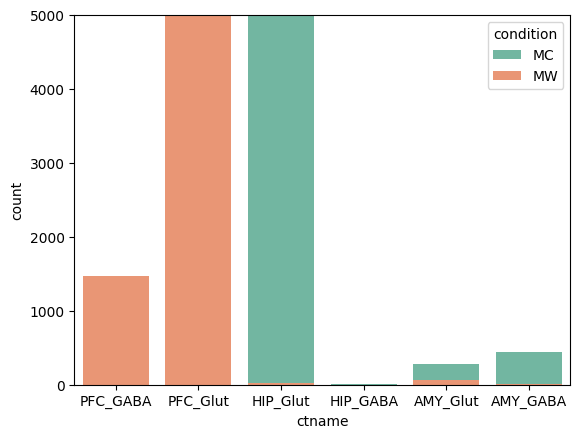

In [114]:
ax = sns.countplot(data=df_inner, x='ctname', hue='condition', dodge=False, palette='Set2',)
plt.ylim(0, 5000)


In [149]:
for ct in df_inner['ctname'].unique():
    for condition in df_inner['condition'].unique():
        try:
            flist = glob.glob(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/*{ct}*{condition}*_inner.hdf5')
            df_report = utils.conclude_pycistargets(flist)  
            df_report_annotation = utils.annotate_region(df_report,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')
            df_report_annotation.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_inner_region_TF.csv', index=False)
        except Exception as e:
            print(f"Error processing {ct} and {condition}: {e}")


Error processing PFC_GABA and MC: "['TF'] not found in axis"
Error processing HIP_Glut and MW: "['TF'] not found in axis"
Error processing HIP_GABA and MW: "['TF'] not found in axis"


In [136]:
df_report_annotation

,motif,key,TFs,region,NES,AUC,Rank,hit,logo,gene_name,gene_id,gstart,gend,strand,distance
0,metacluster_3.11,AMY_GABA_MC_inner,"{Sp3, Sp5, Sp1, Klf5, Sp4, Klf7, Klf3, Sp1, Sp...",chr11:74830146-74830647,18.728999,0.207986,52887.0,264,"<img src=""https://motifcollections.aertslab.or...",Mnt,ENSMUSG00000000282.12,74830919,74845725,+,273
1,metacluster_3.11,AMY_GABA_MC_inner,"{Sp3, Sp5, Sp1, Klf5, Sp4, Klf7, Klf3, Sp1, Sp...",chr5:135008791-135009292,18.728999,0.207986,52887.0,264,"<img src=""https://motifcollections.aertslab.or...",Gm43372,ENSMUSG00000107335.1,135007092,135010108,-,0
2,metacluster_3.11,AMY_GABA_MC_inner,"{Sp3, Sp5, Sp1, Klf5, Sp4, Klf7, Klf3, Sp1, Sp...",chr10:79780578-79781079,18.728999,0.207986,52887.0,264,"<img src=""https://motifcollections.aertslab.or...",Fstl3,ENSMUSG00000020325.10,79777271,79782630,+,0
3,metacluster_3.11,AMY_GABA_MC_inner,"{Sp3, Sp5, Sp1, Klf5, Sp4, Klf7, Klf3, Sp1, Sp...",chr5:134688524-134689025,18.728999,0.207986,52887.0,264,"<img src=""https://motifcollections.aertslab.or...",Limk1,ENSMUSG00000029674.13,134656038,134688598,-,0
4,metacluster_3.11,AMY_GABA_MC_inner,"{Sp3, Sp5, Sp1, Klf5, Sp4, Klf7, Klf3, Sp1, Sp...",chr8:14090167-14090668,18.728999,0.207986,52887.0,264,"<img src=""https://motifcollections.aertslab.or...",Erich1,ENSMUSG00000051978.9,14027560,14090301,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11882,jaspar__MA1122.1,AMY_Glut_MC_inner,"{nan, Tfdp1}",chr10:80701855-80702356,3.179429,0.037892,54438.0,93,"<img src=""https://motifcollections.aertslab.or...",Mob3a,ENSMUSG00000003348.10,80685252,80701977,-,0
11883,jaspar__MA1122.1,AMY_Glut_MC_inner,"{nan, Tfdp1}",chr19:43674765-43675266,3.179429,0.037892,54438.0,93,"<img src=""https://motifcollections.aertslab.or...",Slc25a28,ENSMUSG00000040414.8,43663800,43674881,-,0
11884,jaspar__MA1122.1,AMY_Glut_MC_inner,"{nan, Tfdp1}",chr8:70539339-70539840,3.179429,0.037892,54438.0,93,"<img src=""https://motifcollections.aertslab.or...",Ell,ENSMUSG00000070002.7,70539456,70592858,+,0
11885,jaspar__MA1122.1,AMY_Glut_MC_inner,"{nan, Tfdp1}",chr6:128802937-128803438,3.179429,0.037892,54438.0,93,"<img src=""https://motifcollections.aertslab.or...",Gm44511,ENSMUSG00000107872.2,128780284,128826315,-,0


In [138]:
df_report_annotation.to_csv('/data2st1/junyi/output/atac0416/dar/motif/region_nt/AMT_MC.csv',index=False)

In [ ]:
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover

    temp_df = df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True)
    temp_df['ID'] = temp_df.index
    temp_df.to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
# import subprocess
# files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR.bed')
# for filename in files:
#     experimentname = re.split(r'[./]', filename)[-2]
#     folder_name = os.path.dirname(filename)

#     #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

#     command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
#     print(command_str)
#     subprocess.run(command_str, shell=True)

In [127]:
import subprocess

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/motif/','--write_html']
    print(command_str)
    subprocess.run(command_str)
    
# !pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
# --bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
# --species 'mus_musculus' \
# --auc_threshold 0.005 \
# --nes_threshold 3.0 \
# --rank_threshold 0.05 \
# --path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
# --output_folder '/data2st1/junyi/output/motif/' \
# --write_html 

In [ ]:
import h5py
dict_table = {}
cell_types = ['Neuron','Astro-Epen','Vascular','Immune','OPC-Oligo']
for celltype in cell_types:
    with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_ALL_{celltype}_wilcoxon_DAR_lifted.hdf5', 'r') as f:
        # Open the HDF5 file
        # List all groups and datasets in the file
        print("Keys in the file:", list(f.keys()))
        

        # # Access a specific dataset
        expname = f'ALL_{celltype}_wilcoxon_DAR_lifted'
        dataset = f[expname]  # Replace with your dataset name
        # print("Shape of the dataset:", dataset.shape)
        # print("Data type of the dataset:", dataset.dtype)
        dict_dataset = {}
        #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

        table = f[expname]['motif_enrichment']['table'][:]
        for key in dataset.keys():
            dict_dataset[key] = dataset[key]
        # print("Data:", data)
        dict_table[expname] = table

In [ ]:
for keys in dict_table.keys():
    print(keys)
    print(dict_table[keys][:5])
    #Astro : id, orthology, direcrt, id, msimilarity,logo
    #Neuron : id,logo,orthology, id, direct, msimilarity
    #Vascular : id,logo,orthology,msimilarity,id, direct

In [ ]:
list_table = []
list_key = []
list_TFs = []

df_TF_celltype = pd.DataFrame()

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0].decode('utf-8'))
        list_key.append(key)
        TFs_tmp=[]
        for i in range(1, len(row)-2):
            if 'img' in row[i][0].decode('utf-8') or 'wilcoxon' in row[i][0].decode('utf-8'):
                continue
            TFs_tmp+=([ tf.decode('utf-8') for tf in row[i]])

        df_tfs = pd.DataFrame({'TF':",".join(TFs_tmp).split(',')})
        df_tfs['NES'] = row[-2][0]
        df_tfs['AUC'] = row[-2][1]
        df_tfs['Rank'] = row[-2][2]
        df_tfs['celltype.L1'] = key.split('_')[1]
        df_tfs['id'] = row[0].decode('utf-8')

        list_TFs.append(set(TFs_tmp))
        df_TF_celltype = pd.concat([df_TF_celltype,df_tfs],axis=0)
        
df_TF = pd.DataFrame({'TF':list_table,'key':list_key,'TFs':list_TFs})

In [ ]:
df_TF_celltype.drop_duplicates(inplace=True)


In [ ]:
df_TF_celltype

In [ ]:
df_RSS = pd.read_csv("/home/junyichen/code/scmmd/data/RSS_Score(only pos).csv",index_col=0)

In [ ]:
df_RSS['TF']=df_RSS['Topic'].str.replace('[()+]','')

In [ ]:
cell_to_category = {
    # Astro-Epen
    'Astro-Gfaphigh': 'Astro-Epen',
    'Astro-TE': 'Astro-Epen',
    
    # Immune
    'Microglia': 'Immune',
    'PVM': 'Immune',
    
    # Neuron
    'L2/3 IT': 'Neuron',
    'L4/5 IT': 'Neuron',
    'L5 ET': 'Neuron',
    'L6 CT': 'Neuron',
    'L6 IT': 'Neuron',
    'L6b': 'Neuron',
    'Lamp5 GABA': 'Neuron',
    'Pvalb GABA': 'Neuron',
    'Pvalb Vipr2 GABA': 'Neuron',
    'Sst GABA': 'Neuron',
    'Vip GABA': 'Neuron',
    
    # OPC-Oligo
    'COP': 'OPC-Oligo',
    'MFOL': 'OPC-Oligo',
    'MOL': 'OPC-Oligo',
    'NFOL': 'OPC-Oligo',
    'NP': 'OPC-Oligo',
    'OPC': 'OPC-Oligo',
    
    # Vascular
    'Arachnoid barrier cell': 'Vascular',
    'Car3': 'Vascular',
    'Endothelial cell': 'Vascular',
    'Pericyte': 'Vascular',
    'VLMC': 'Vascular'
}

In [ ]:
df_RSS['celltype.L1'] = df_RSS['celltype.L2'].map(cell_to_category)


In [ ]:
df_TF_celltype.groupby(['celltype.L1']).nunique()

In [ ]:
df_RSS.groupby(['celltype.L1']).nunique()

In [ ]:
df_merged = df_RSS.merge(df_TF_celltype,left_on=['TF','celltype.L1'],right_on=['TF','celltype.L1'],how='inner')

In [ ]:
df_merged.sort_values(by='RSS',ascending=False,inplace=True)

In [ ]:
df_merged.drop_duplicates(set(['TF','celltype.L1']),keep='first').to_csv('/data2st1/junyi/output/motif/TF_RSS.csv',index=False)

In [ ]:
df_merged.groupby('celltype.L1').nunique()

In [ ]:
ct = pd.crosstab(df_merged['celltype'],df_merged['celltype.L1'],values=df_merged['RSS'],aggfunc='count')

In [ ]:
ct

In [ ]:
set(df_merged['celltype']
)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html 

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon.csv')
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover
    df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True).to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    folder_name = os.path.dirname(filename)

    #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

    command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# from pyliftover import LiftOver
# lo = LiftOver('/data2st1/junyi/mm10ToMm39.over.chain.gz')
# lo.convert_coordinate('chr1', 1000000, '-')


In [ ]:
result_frame = pd.DataFrame()
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted_gene.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    region = re.split(r'_',experimentname)[0]
    celltype = re.split(r'_',experimentname)[1]
    condition = re.split(r'_',experimentname)[2]
    try:
        df = pd.read_csv(filename,sep='\t',header=None)
    except:
        continue
    df.columns = ['chrom','start','end','chrom2','start2','end2','score','starnd','gene_name','gene_id','annotation','distance']
    df['region'] = region
    df['celltype'] = celltype
    df['condition'] = condition
    df['name'] = df['chrom'] + ':' + df['start'].astype(str) + '-' + df['end'].astype(str)
    # df_score = pd.read_csv(f"/data2st1/junyi/output/motif/{region}_{celltype}_{condition}_wilcoxon.csv",index_col=0)
    # df['logfoldchanges'] = df_score.set_index('names').loc[df['name'],'logfoldchanges'].values
    # df['pvals'] = df_score.set_index('names').loc[df['name'],'pvals'].values
    result_frame = pd.concat([result_frame,df])

In [ ]:
ax = sns.countplot(data=result_frame, x='celltype', hue='region', dodge=False, palette='Set2',)
ax.set_ylim(0,6000)


In [ ]:
keep1=result_frame.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])
keep1['generegion'] = 'genebody'
keep1.loc[keep1['distance']<0,'generegion'] = 'downstream'
promoter = keep1.loc[(keep1['distance']>0) & (keep1['distance']<=2000) & (keep1['starnd']=='+')].index
distal = keep1.loc[(keep1['distance']>0) & (keep1['distance']>=2000) & (keep1['starnd']=='+')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'

promoter = keep1.loc[(keep1['distance']<0) & (keep1['distance']>=-2000) & (keep1['starnd']=='-')].index
distal = keep1.loc[(keep1['distance']<0) & (keep1['distance']<=-2000) & (keep1['starnd']=='-')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'


In [ ]:
keep1=keep1.loc[keep1['start2']>0]

In [ ]:
keep1.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])

In [ ]:
ax = sns.countplot(data=keep1, x='celltype', hue='generegion', dodge=False, palette='Set2',)

In [ ]:
pd.read_csv('/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon.csv',index_col=0)

In [ ]:
# Convert hg38 to hg19
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_unmap.bed


In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
import h5py
import copy

regions = ['AMY','HIP','PFC']
celltypes = ['Neuron']

dict_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

            table = f[expname]['motif_enrichment']['table'][:]
            for key in dataset.keys():
                dict_dataset[key] = dataset[key]
            # print("Data:", data)
            dict_table[expname] = table

In [ ]:
for i in dict_table['AMY_Neuron_MC_wilcoxon_DAR_lifted']:
    print(i[0])

In [ ]:
region_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            region_table[expname] = region

In [ ]:
import numpy as np

list_table = []
list_key = []

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0])
        list_key.append(key)
df_TF = pd.DataFrame({'TF':list_table,'key':list_key})

In [ ]:
df_TF

In [ ]:
df_count = df_TF.groupby('TF').count().sort_values(by='key',ascending=False)

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions = pd.DataFrame()

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)


            for TF in df_count[df_count['key']>2].index:
                region = f[expname]['motif_hits']['region_set'][TF][:]
                decoded_data = [item.decode('utf-8') for item in region]
                df_region = pd.DataFrame(decoded_data,columns=['region'])
                df_region['expreiment'] = expname
                df_region['TF'] = TF.decode('utf-8')
                if len(df_regions)>0:
                    df_regions = pd.concat([df_regions,df_region],axis=0,ignore_index=True)
                else:
                    df_regions = df_region
            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            #region_table[expname] = df_regions

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions.head(10)

In [ ]:
region_table

In [ ]:
sns.countplot(data=df_TF, x='key', dodge=False, palette='Set2',)
plt.xticks(rotation=60)


In [ ]:
for key in dict_table.keys():
    print(len(dict_table[key]))

In [ ]:
table